In [1]:
#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
# %matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
df = pd.read_csv('datasetforML.csv') # Load the dataset for training and testing (holdout or crossvalidation)
df.head().append(df.tail()) # Display the head and tail of the dataset

,class,ABETA,TAU,PTAU,C4_0,C8_0,GLYCERIC_ACID,L_ASPARTIC_ACID,X3_HYDROXYBUTYRIC_ACID,L_TYROSINE,L_MALIC_ACID,C20_4_CIS_5_8_11_14,P_CRESOL_SULFATE
0,1,143.0,46.9,19.5,0.212634,2.04781,7.69950,20.05410,41.5639,78.7359,2.94612,13.23200,85.0464
1,1,122.0,157.0,45.8,0.396775,1.33292,4.24069,13.15980,241.5800,65.7743,2.76235,14.53710,22.3870
2,1,87.8,81.0,30.5,21.084800,3.29611,14.98030,21.64500,350.8970,63.2748,2.58309,46.70650,84.9689
3,0,120.0,79.8,36.7,3.813100,1.50797,5.41211,16.01060,78.7722,85.4399,4.65400,10.22050,78.7273
4,1,148.0,170.0,35.3,0.727994,1.33092,3.35665,13.86400,487.1200,74.0226,3.30410,16.59820,54.2003
102,0,278.0,60.7,20.5,0.719178,1.17441,1.97311,8.97745,91.0024,68.0571,1.63393,14.56180,12.2336
103,0,259.0,67.4,23.0,0.531846,1.29392,2.52683,9.06564,137.3780,64.8644,1.86652,20.11470,23.3158
104,1,157.0,282.0,68.3,0.493994,1.14100,1.06629,10.77140,410.9240,72.7523,2.37949,16.01340,21.8629
105,0,217.0,21.6,11.3,0.457150,1.08872,2.44733,17.49950,48.6312,97.5227,2.21424,9.84558,13.4250
106,0,118.0,182.0,52.6,0.366967,1.19752,2.05459,7.39893,136.4470,84.2017,1.78113,16.28010,56.2653


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   class                   107 non-null    int64  
 1   ABETA                   107 non-null    float64
 2   TAU                     107 non-null    float64
 3   PTAU                    107 non-null    float64
 4   C4_0                    107 non-null    float64
 5   C8_0                    107 non-null    float64
 6   GLYCERIC_ACID           107 non-null    float64
 7   L_ASPARTIC_ACID         107 non-null    float64
 8   X3_HYDROXYBUTYRIC_ACID  107 non-null    float64
 9   L_TYROSINE              107 non-null    float64
 10  L_MALIC_ACID            107 non-null    float64
 11  C20_4_CIS_5_8_11_14     107 non-null    float64
 12  P_CRESOL_SULFATE        107 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 11.0 KB


In [4]:
attributes=df[['ABETA','TAU','PTAU','C4_0','C8_0','GLYCERIC_ACID','L_ASPARTIC_ACID','X3_HYDROXYBUTYRIC_ACID','L_TYROSINE','L_MALIC_ACID','C20_4_CIS_5_8_11_14','P_CRESOL_SULFATE']]
attributes.head()

,ABETA,TAU,PTAU,C4_0,C8_0,GLYCERIC_ACID,L_ASPARTIC_ACID,X3_HYDROXYBUTYRIC_ACID,L_TYROSINE,L_MALIC_ACID,C20_4_CIS_5_8_11_14,P_CRESOL_SULFATE
0,143.0,46.9,19.5,0.212634,2.04781,7.69950,20.0541,41.5639,78.7359,2.94612,13.2320,85.0464
1,122.0,157.0,45.8,0.396775,1.33292,4.24069,13.1598,241.5800,65.7743,2.76235,14.5371,22.3870
2,87.8,81.0,30.5,21.084800,3.29611,14.98030,21.6450,350.8970,63.2748,2.58309,46.7065,84.9689
3,120.0,79.8,36.7,3.813100,1.50797,5.41211,16.0106,78.7722,85.4399,4.65400,10.2205,78.7273
4,148.0,170.0,35.3,0.727994,1.33092,3.35665,13.8640,487.1200,74.0226,3.30410,16.5982,54.2003


In [5]:
target=df['class']
target.head()

0    1
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
X_train, X_test, y_train, y_test = train_test_split(attributes, target,
                                                    stratify=target, 
                                                    test_size = 0.3, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (74, 12)
Number transactions y_train dataset:  (74,)
Number transactions X_test dataset:  (33, 12)
Number transactions y_test dataset:  (33,)


In [7]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2



In [8]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(attributes))
X_train2.columns = attributes.columns.values
X_train2.index = attributes.index.values
X_train = X_train2


In [9]:
X_train

,ABETA,TAU,PTAU,C4_0,C8_0,GLYCERIC_ACID,L_ASPARTIC_ACID,X3_HYDROXYBUTYRIC_ACID,L_TYROSINE,L_MALIC_ACID,C20_4_CIS_5_8_11_14,P_CRESOL_SULFATE
0,-0.552512,-0.876934,-0.979234,-0.270425,0.820626,2.557874,2.626217,-0.902652,0.394212,0.585536,-0.493620,1.098433
1,-0.933725,1.077122,0.344458,-0.179308,-0.274508,0.568152,0.638053,0.059937,-0.481259,0.360938,-0.286474,-0.758116
2,-1.554557,-0.271727,-0.425599,10.057570,2.732886,6.746241,3.084997,0.586032,-0.650083,0.141852,4.819466,1.096137
3,-0.970031,-0.293025,-0.113549,1.511163,-0.006350,1.242025,1.460161,-0.723585,0.847023,2.672854,-0.971606,0.911203
4,-0.461747,1.307846,-0.184012,-0.015414,-0.277572,0.059597,0.841129,1.241613,0.075860,1.023048,0.040665,0.184488
...,...,...,...,...,...,...,...,...,...,...,...,...
102,1.898140,-0.632011,-0.928904,-0.019776,-0.517328,-0.736301,-0.568044,-0.664726,-0.327071,-1.018182,-0.282553,-1.058953
103,1.553233,-0.513100,-0.803077,-0.112472,-0.334252,-0.417767,-0.542612,-0.441541,-0.542716,-0.733918,0.598805,-0.730596
104,-0.298370,3.295622,1.476895,-0.131202,-0.568509,-1.257960,-0.050709,0.874915,-0.009941,-0.106982,-0.052155,-0.773644
105,0.790808,-1.325959,-1.391944,-0.149433,-0.648596,-0.463500,1.889527,-0.868640,1.663136,-0.308945,-1.031113,-1.023653


In [10]:
y_train=target

C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab


[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab

[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab

[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


No handles with labels found to put in legend.


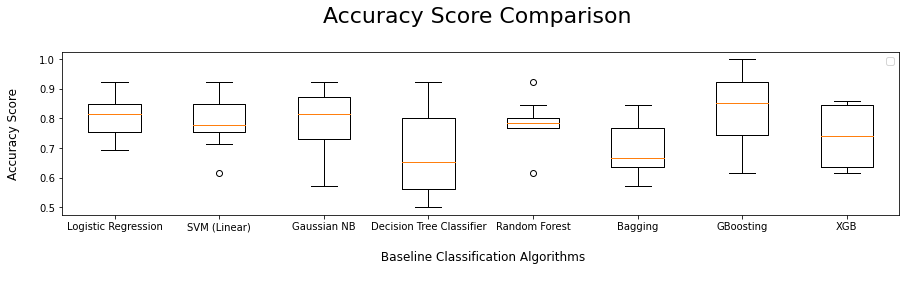

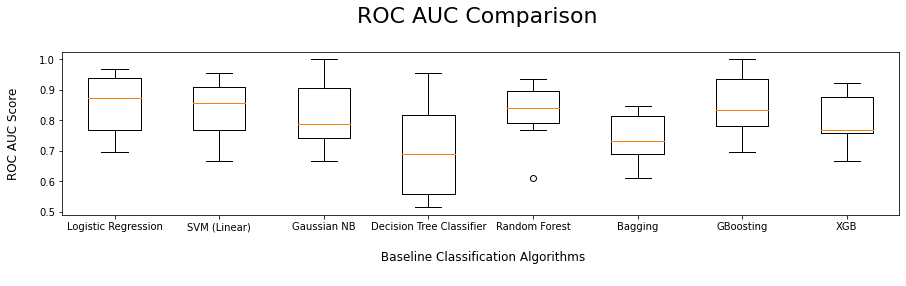

In [11]:
# Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC/AUC Scores


models = []

models.append(('Logistic Regression', LogisticRegression(random_state = 0)))

models.append(('SVM (Linear)', SVC(kernel = 'linear', random_state = 0)))


#models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

models.append(('Bagging', BaggingClassifier()))

models.append(('GBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))
#models.append(('GBoosting', GradientBoostingClassifier(random_state=0)))

param_dist = {'objective':'binary:logistic', 'n_estimators':2}
models.append(('XGB', XGBClassifier(**param_dist)))
#models.append(('XGB', XGBClassifier()))

#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=8, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------

  
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# using Area under ROC Curve:

fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [12]:
model_results

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,85.13,9.97,80.43,7.30
1,SVM (Linear),83.30,9.71,78.50,8.82
2,Gaussian NB,81.56,10.82,78.64,12.33
3,Decision Tree Classifier,70.50,15.99,68.41,14.42
4,Random Forest,82.36,9.56,78.50,8.07
5,Bagging,73.76,7.73,69.37,8.73
6,GBoosting,85.28,10.31,82.07,13.26
7,XGB,80.12,8.47,73.83,9.89


In [ ]:
# Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC/AUC Scores


models = []

models.append(('Logistic Regression', LogisticRegression(random_state = 0)))

models.append(('SVM (Linear)', SVC(kernel = 'linear', random_state = 0)))


#models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


#models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))

models.append(('Bagging', BaggingClassifier()))

models.append(('GBoosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)))
models.append(('GBoosting', GradientBoostingClassifier(random_state=0)))

param_dist = {'objective':'binary:logistic', 'n_estimators':2}
models.append(('XGB', XGBClassifier(**param_dist)))
#models.append(('XGB', XGBClassifier()))

#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------

  
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

# using Area under ROC Curve:

fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()


In [ ]:
model_results